In [78]:
import sys
import s3fs
import boto3
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import preprocessing

INT_MAX = (2**32) - 1
le = preprocessing.LabelEncoder()
s3 = boto3.client('s3')
BUCKET = 'ioccino-data'

In [79]:
def df_to_s3(df):
    bytes_to_write = df.to_csv(None).encode()
    fs = s3fs.S3FileSystem()
    with fs.open('s3://' + BUCKET + '/data/mturk-coffee-flavors-'+ get_str_date() +'.csv', 'wb') as f:
        f.write(bytes_to_write)

In [80]:
def normalize_df(df):
    for c in df.columns.values:
        if c != 'Target':
            x_array = np.array(df[c])
            df[c] = preprocessing.normalize([x_array])[0]
    return df

In [81]:
def get_str_date():
    return str(datetime.now()).replace(' ', '_')

In [90]:
def str_label_into_numbers(df):
    # Converting string labels into numbers.
    df['Answer.age'] = le.fit_transform(df['Answer.age'])
    df['Gender'] = le.fit_transform(df['Gender'])
    df['Target'] = le.fit_transform(df['Target'])
    df['Mood'] = le.fit_transform(df['Mood'])
    df['Temperature'] = le.fit_transform(df['Temperature'])
    return df

In [91]:
def main():
    try:
        df = pd.read_csv('s3://' + BUCKET + '/raw-data/mturk-coffee-flavors.csv')
        df.columns = ['SubmitTime', 'Answer.age', 'Gender', 'Flavor', 'Mood', 'Temperature']
        del df['SubmitTime']
        df.rename(columns={'Flavor': 'Target'}, inplace=True)
        
        #df['Target'] = df['Target'].apply(lambda x: x.split(' ')[0]).copy()
        df = df[df.Target != 'No Coffee']
        df = df[df.Target != 'Pleno']
    
        df = str_label_into_numbers(df)
        df = normalize_df(df)
        df_to_s3(df)
        ret = df
    except Exception as e:
        print('erro:', e)
        ret = None
    return ret

In [92]:
df = main()

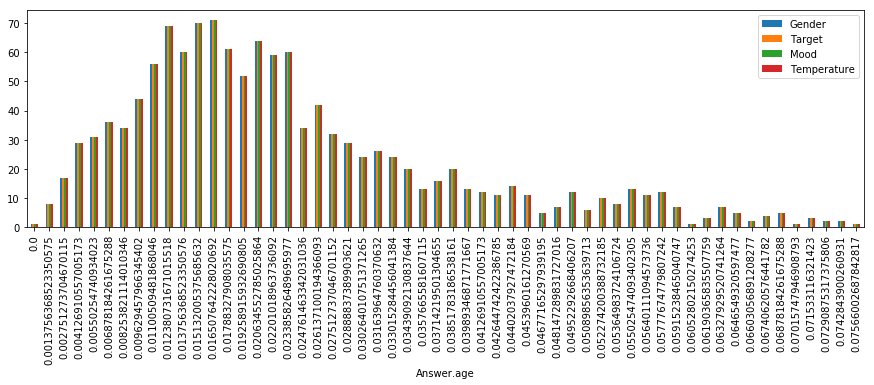

In [93]:
df.groupby(['Answer.age']).count().plot(figsize=(15,4), kind='bar')

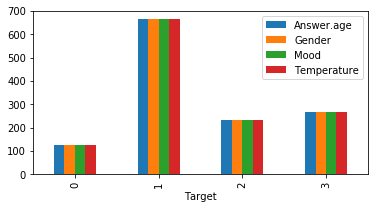

In [94]:
df.groupby(['Target']).count().plot(figsize=(6,3), kind='bar')

In [95]:
df

,Answer.age,Gender,Target,Mood,Temperature
0,0.004127,0.000000,1,0.064897,0.028396
1,0.068782,0.039253,3,0.000000,0.028396
2,0.031640,0.039253,2,0.000000,0.028396
3,0.038518,0.000000,1,0.000000,0.028396
4,0.011005,0.000000,2,0.038938,0.009465
5,0.022010,0.039253,0,0.000000,0.028396
6,0.016508,0.000000,3,0.000000,0.018930
7,0.028888,0.039253,2,0.000000,0.018930
8,0.033015,0.039253,3,0.000000,0.018930
9,0.005503,0.078507,1,0.000000,0.028396


In [102]:
a = le.fit_transform([])

In [109]:
preprocessing.normalize([[0, 1, 2]])

array([[0.        , 0.4472136 , 0.89442719]])